In [288]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor 
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report,accuracy_score
import rasterio
from rasterio import plot
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import confusion_matrix, precision_score, recall_score
from xgboost import XGBClassifier



In [289]:
df_train=pd.read_csv("Train.csv")
df_test=pd.read_csv("Test.csv")

In [290]:
df_train.head(111)

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,Married-spouse-absent,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,Married-civ-spouse,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,Divorced,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,Separated,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,Married-civ-spouse,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True
5,28523,Divorced,Auto,Comedy,Female,40,Primetime,United-States,0.027465,Low,Yes,False
6,12290,Married-civ-spouse,Pharma,Infomercial,Male,50,Morning,Outlying-US(Guam-USVI-etc),0.027465,High,No,False
7,20866,Never-married,Political,Infomercial,Male,40,Primetime,United-States,0.027465,Low,Yes,False
8,21312,Married-civ-spouse,Pharma,Comedy,Male,40,Morning,United-States,0.027465,High,No,False
9,16479,Never-married,ClassAction,Comedy,Female,35,Morning,United-States,0.027465,Low,No,False


In [239]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
id                                   26048 non-null int64
realtionship_status                  26048 non-null object
industry                             26048 non-null object
genre                                26048 non-null object
targeted_sex                         26048 non-null object
average_runtime(minutes_per_week)    26048 non-null int64
airtime                              26048 non-null object
airlocation                          26048 non-null object
ratings                              26048 non-null float64
expensive                            26048 non-null object
money_back_guarantee                 26048 non-null object
netgain                              26048 non-null bool
dtypes: bool(1), float64(1), int64(2), object(8)
memory usage: 2.2+ MB


In [240]:
df_train.describe()

,id,average_runtime(minutes_per_week),ratings
count,26048.000000,26048.000000,26048.000000
mean,16268.744779,40.294111,0.038716
std,9413.578020,12.479457,0.075852
min,2.000000,1.000000,0.000000
25%,8095.750000,40.000000,0.027465
50%,16237.000000,40.000000,0.027465
75%,24413.500000,45.000000,0.027465
max,32561.000000,99.000000,1.000000


In [241]:
df_train.isnull().sum()

id                                   0
realtionship_status                  0
industry                             0
genre                                0
targeted_sex                         0
average_runtime(minutes_per_week)    0
airtime                              0
airlocation                          0
ratings                              0
expensive                            0
money_back_guarantee                 0
netgain                              0
dtype: int64

In [242]:
np.unique(df_train["realtionship_status"])

array(['Divorced', 'Married-AF-spouse', 'Married-civ-spouse',
       'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'],
      dtype=object)

In [243]:
combine = [df_train, df_test]
title_mapping = {"Divorced": 1, "Married-AF-spouse": 2, "Married-civ-spouse": 3, "Married-spouse-absent": 4, "Never-married": 5,"Widowed":6}
for dataset in combine:
    dataset['realtionship_status'] = dataset['realtionship_status'].map(title_mapping)
    dataset['realtionship_status'] = dataset['realtionship_status'].fillna(0)
    dataset['realtionship_status']= dataset['realtionship_status'].astype(np.int64)

df_train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,4,Auto,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,3,Pharma,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,1,Entertainment,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,0,Political,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,3,Pharma,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [244]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
id                                   26048 non-null int64
realtionship_status                  26048 non-null int64
industry                             26048 non-null object
genre                                26048 non-null object
targeted_sex                         26048 non-null object
average_runtime(minutes_per_week)    26048 non-null int64
airtime                              26048 non-null object
airlocation                          26048 non-null object
ratings                              26048 non-null float64
expensive                            26048 non-null object
money_back_guarantee                 26048 non-null object
netgain                              26048 non-null bool
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 2.2+ MB


In [245]:
np.unique(df_train["industry"])

array(['Auto', 'ClassAction', 'Entertainment', 'Other', 'Pharma',
       'Political'], dtype=object)

In [246]:
combine = [df_train, df_test]
title_mapping = {"Auto": 1, "ClassAction": 2, "Entertainment": 3, "Other": 4, "Pharma": 5,"Political":6}
for dataset in combine:
    dataset['industry'] = dataset['industry'].map(title_mapping)
    dataset['industry'] = dataset['industry'].fillna(0)

df_train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,4,1,Comedy,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,3,5,Comedy,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,1,3,Comedy,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,0,6,Infomercial,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,3,5,Comedy,Male,48,Primetime,United-States,0.027465,High,No,True


In [247]:
np.unique(df_train["genre"])

array(['Comedy', 'Direct', 'Drama', 'Infomercial', 'Other'], dtype=object)

In [248]:
combine = [df_train, df_test]
title_mapping = {"Comedy": 1, "Direct": 2, "Drama": 3, "Infomercial": 5,"Other":4}
for dataset in combine:
    dataset['genre'] = dataset['genre'].map(title_mapping)
    dataset['genre'] = dataset['genre'].fillna(0)

df_train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,4,1,1,Male,45,Primetime,United-States,0.027465,High,No,False
1,31593,3,5,1,Male,45,Primetime,United-States,0.027465,Low,No,False
2,5681,1,3,1,Female,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,0,6,5,Female,40,Primetime,United-States,0.027465,Low,No,False
4,23587,3,5,1,Male,48,Primetime,United-States,0.027465,High,No,True


In [249]:
np.unique(df_train["targeted_sex"])

array(['Female', 'Male'], dtype=object)

In [250]:
combine = [df_train, df_test]
title_mapping = {"Male": 1, "Female": 2}
for dataset in combine:
    dataset['targeted_sex'] = dataset['targeted_sex'].map(title_mapping)
    dataset['targeted_sex'] = dataset['targeted_sex'].fillna(0)

df_train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,4,1,1,1,45,Primetime,United-States,0.027465,High,No,False
1,31593,3,5,1,1,45,Primetime,United-States,0.027465,Low,No,False
2,5681,1,3,1,2,45,Primetime,United-States,0.027465,High,Yes,False
3,15491,0,6,5,2,40,Primetime,United-States,0.027465,Low,No,False
4,23587,3,5,1,1,48,Primetime,United-States,0.027465,High,No,True


In [251]:
np.unique(df_train["airtime"])

array(['Daytime', 'Morning', 'Primetime'], dtype=object)

In [252]:
combine = [df_train, df_test]
title_mapping = {"Daytime": 1, "Morning": 2,"Primetime":3}
for dataset in combine:
    dataset['airtime'] = dataset['airtime'].map(title_mapping)
    dataset['airtime'] = dataset['airtime'].fillna(0)

df_train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,4,1,1,1,45,3,United-States,0.027465,High,No,False
1,31593,3,5,1,1,45,3,United-States,0.027465,Low,No,False
2,5681,1,3,1,2,45,3,United-States,0.027465,High,Yes,False
3,15491,0,6,5,2,40,3,United-States,0.027465,Low,No,False
4,23587,3,5,1,1,48,3,United-States,0.027465,High,No,True


In [253]:
np.unique(df_train["airlocation"])

array(['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba',
       'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England',
       'France', 'Germany', 'Greece', 'Guatemala', 'Haiti',
       'Holand-Netherlands', 'Honduras', 'Hong', 'Hungary', 'India',
       'International', 'Iran', 'Ireland', 'Italy', 'Jamaica', 'Japan',
       'Laos', 'Mexico', 'Nicaragua', 'Outlying-US(Guam-USVI-etc)',
       'Peru', 'Philippines', 'Poland', 'Portugal', 'Puerto-Rico',
       'Scotland', 'South', 'Taiwan', 'Thailand', 'Trinadad&Tobago',
       'United-States', 'Vietnam', 'Yugoslavia'], dtype=object)

In [254]:
combine = [df_train, df_test]
title_mapping = {'Cambodia':1, 'Canada':2, 'China':3, 'Columbia':4, 'Cuba':5,
       'Dominican-Republic':6, 'Ecuador':7, 'El-Salvador':8, 'England':9,
       'France':10, 'Germany':11, 'Greece':12, 'Guatemala':13, 'Haiti':14,
       'Holand-Netherlands':15, 'Honduras':16, 'Hong':17, 'Hungary':18, 'India':19,
       'International':20, 'Iran':21, 'Ireland':22, 'Italy':23, 'Jamaica':24, 'Japan':25,
       'Laos':26, 'Mexico':27, 'Nicaragua':28, 'Outlying-US(Guam-USVI-etc)':29,
       'Peru':30, 'Philippines':31, 'Poland':32, 'Portugal':33, 'Puerto-Rico':34,
       'Scotland':35, 'South':36, 'Taiwan':37, 'Thailand':38, 'Trinadad&Tobago':39,
       'United-States':40, 'Vietnam':41, 'Yugoslavia':42}
for dataset in combine:
    dataset['airlocation'] = dataset['airlocation'].map(title_mapping)
    dataset['airlocation'] = dataset['airlocation'].fillna(0)

df_train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,4,1,1,1,45,3,40,0.027465,High,No,False
1,31593,3,5,1,1,45,3,40,0.027465,Low,No,False
2,5681,1,3,1,2,45,3,40,0.027465,High,Yes,False
3,15491,0,6,5,2,40,3,40,0.027465,Low,No,False
4,23587,3,5,1,1,48,3,40,0.027465,High,No,True


In [255]:
np.unique(df_train["expensive"])

array(['High', 'Low', 'Medium'], dtype=object)

In [256]:
combine = [df_train, df_test]
title_mapping = {"High": 1, "Low": 2,"Medium":3}
for dataset in combine:
    dataset['expensive'] = dataset['expensive'].map(title_mapping)
    dataset['expensive'] = dataset['expensive'].fillna(0)

df_train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,4,1,1,1,45,3,40,0.027465,1,No,False
1,31593,3,5,1,1,45,3,40,0.027465,2,No,False
2,5681,1,3,1,2,45,3,40,0.027465,1,Yes,False
3,15491,0,6,5,2,40,3,40,0.027465,2,No,False
4,23587,3,5,1,1,48,3,40,0.027465,1,No,True


In [257]:
np.unique(df_train["money_back_guarantee"])

array(['No', 'Yes'], dtype=object)

In [258]:
combine = [df_train, df_test]
title_mapping = {"No": 0, "Yes": 1}
for dataset in combine:
    dataset['money_back_guarantee'] = dataset['money_back_guarantee'].map(title_mapping)
    dataset['money_back_guarantee'] = dataset['money_back_guarantee'].fillna(0)

df_train.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,19717,4,1,1,1,45,3,40,0.027465,1,0,False
1,31593,3,5,1,1,45,3,40,0.027465,2,0,False
2,5681,1,3,1,2,45,3,40,0.027465,1,1,False
3,15491,0,6,5,2,40,3,40,0.027465,2,0,False
4,23587,3,5,1,1,48,3,40,0.027465,1,0,True


In [259]:
np.unique(df_train["netgain"])

array([False,  True])

In [260]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_train['netgain'])
df_train['netgain']=le.transform(df_train['netgain']) 

In [261]:
df_train.columns

Index(['id', 'realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee', 'netgain'],
      dtype='object')

In [262]:
df_train.to_csv("new_data1.csv")

In [263]:
X=df_train[['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee']]
y=df_train["netgain"]

In [264]:


xTrain, xTest, yTrain, yTest = train_test_split(X, y, test_size=0.2, random_state=42)

# print(xTrain.shape)
# print(yTrain.shape)

# print(xTest.shape)
# print(yTest.shape)

sc=StandardScaler()
X_train=sc.fit_transform(xTrain)
X_test=sc.transform(xTest)
# print(X_train)
# print(X_test)

C:\Users\gaikw\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\gaikw\Anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\gaikw\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  # This is added back by InteractiveShellApp.init_path()


In [265]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
rfc.fit(X_train, yTrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [266]:

ypred_rfc = rfc.predict(X_test)
ypred_rfc

array([0, 0, 0, ..., 1, 0, 0], dtype=int64)

In [267]:
cm_rfc=confusion_matrix(yTest,ypred_rfc)
print()

print("accuracy_score on test set",accuracy_score(yTest, ypred_rfc))
print()
print("classification_report")
print(classification_report(yTest, ypred_rfc))


accuracy_score on test set 0.7973128598848368

classification_report
              precision    recall  f1-score   support

           0       0.84      0.90      0.87      3955
           1       0.60      0.46      0.52      1255

   micro avg       0.80      0.80      0.80      5210
   macro avg       0.72      0.68      0.70      5210
weighted avg       0.78      0.80      0.79      5210



In [268]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):

    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]


    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

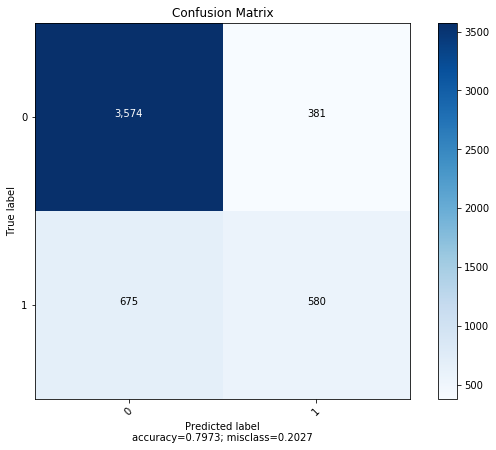

In [269]:
plot_confusion_matrix(cm= np.array(cm_rfc), normalize    = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

In [270]:
clf_ada = AdaBoostClassifier(n_estimators=50)
clf_ada.fit(X_train, yTrain)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None)

In [271]:
ypred_ada = clf_ada.predict(X_test)
print(accuracy_score(yTest, ypred_ada))
print(classification_report(yTest, ypred_ada))

0.8140115163147793
              precision    recall  f1-score   support

           0       0.85      0.92      0.88      3955
           1       0.66      0.47      0.55      1255

   micro avg       0.81      0.81      0.81      5210
   macro avg       0.75      0.70      0.72      5210
weighted avg       0.80      0.81      0.80      5210



In [272]:
cm_ada=confusion_matrix(yTest,ypred_ada)
print(cm_ada)

[[3651  304]
 [ 665  590]]


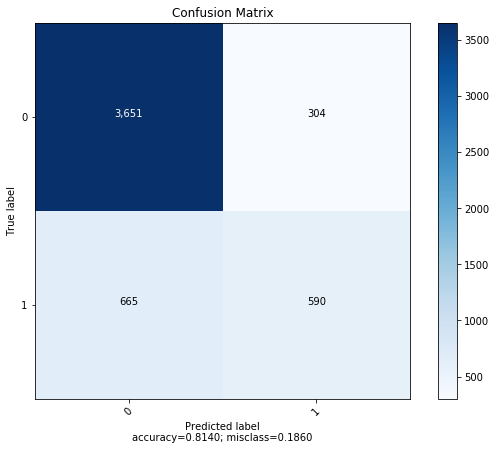

In [273]:
plot_confusion_matrix(cm= np.array(cm_ada), normalize = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

In [274]:
clf_xgb=XGBClassifier()
clf_xgb.fit(X_train,yTrain)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=0.1,
       max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
       n_estimators=100, n_jobs=1, nthread=None,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
       subsample=1, verbosity=1)

In [275]:
ypred_xgb = clf_xgb.predict(X_test)

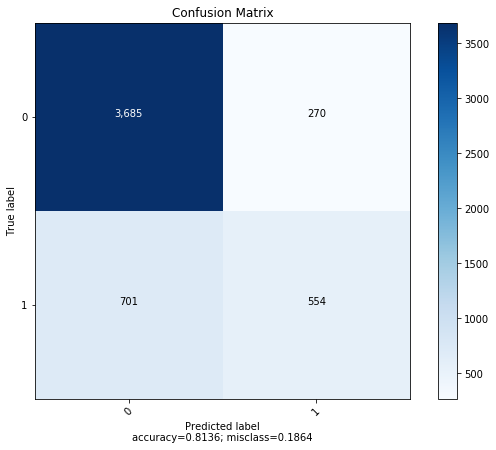

In [276]:
cm_xgb=confusion_matrix(yTest,ypred_xgb)
plot_confusion_matrix(cm= np.array(cm_xgb), normalize = False,
                      target_names = ['0', '1'],
                      title        = "Confusion Matrix")

In [277]:

print("Test_set accuracy",accuracy_score(yTest, ypred_xgb))
print(classification_report(yTest, ypred_xgb))

Test_set accuracy 0.8136276391554702
              precision    recall  f1-score   support

           0       0.84      0.93      0.88      3955
           1       0.67      0.44      0.53      1255

   micro avg       0.81      0.81      0.81      5210
   macro avg       0.76      0.69      0.71      5210
weighted avg       0.80      0.81      0.80      5210



In [278]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26048 entries, 0 to 26047
Data columns (total 12 columns):
id                                   26048 non-null int64
realtionship_status                  26048 non-null int64
industry                             26048 non-null int64
genre                                26048 non-null int64
targeted_sex                         26048 non-null int64
average_runtime(minutes_per_week)    26048 non-null int64
airtime                              26048 non-null int64
airlocation                          26048 non-null int64
ratings                              26048 non-null float64
expensive                            26048 non-null int64
money_back_guarantee                 26048 non-null int64
netgain                              26048 non-null int64
dtypes: float64(1), int64(11)
memory usage: 2.4 MB


In [279]:
df_test.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee
0,1,6,1,1,2,10,1,40,0.027465,2,0
1,4,3,5,1,1,40,2,40,0.056262,1,1
2,5,1,3,1,2,50,2,40,0.027465,2,0
3,9,3,5,5,1,40,3,40,0.027465,2,0
4,10,3,5,1,1,40,3,40,0.027465,2,1


In [280]:
X_test1=df_test[['realtionship_status', 'industry', 'genre', 'targeted_sex',
       'average_runtime(minutes_per_week)', 'airtime', 'airlocation',
       'ratings', 'expensive', 'money_back_guarantee']]

In [281]:
X_test1=sc.transform(X_test1)
# print(X_train)
# print(X_test)

C:\Users\gaikw\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


In [282]:
ypred_rfc1 = clf_ada.predict(X_test1)

In [283]:
ypred_rfc1

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [284]:
df_test["netgain"]=ypred_rfc1

In [285]:
df_test.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,1,6,1,1,2,10,1,40,0.027465,2,0,0
1,4,3,5,1,1,40,2,40,0.056262,1,1,0
2,5,1,3,1,2,50,2,40,0.027465,2,0,0
3,9,3,5,5,1,40,3,40,0.027465,2,0,0
4,10,3,5,1,1,40,3,40,0.027465,2,1,0


In [286]:

title_mapping = {0:"False",1:"True"}

df_test['netgain'] = df_test['netgain'].map(title_mapping)


df_test.head()

,id,realtionship_status,industry,genre,targeted_sex,average_runtime(minutes_per_week),airtime,airlocation,ratings,expensive,money_back_guarantee,netgain
0,1,6,1,1,2,10,1,40,0.027465,2,0,False
1,4,3,5,1,1,40,2,40,0.056262,1,1,False
2,5,1,3,1,2,50,2,40,0.027465,2,0,False
3,9,3,5,5,1,40,3,40,0.027465,2,0,False
4,10,3,5,1,1,40,3,40,0.027465,2,1,False


In [287]:
df_test.to_csv("submission.csv")